In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [177]:
chain = pd.read_csv("../option_chain.csv").dropna()
calls = chain[chain["right"] == "C"]
puts = chain[chain["right"] == "P"]

atm_call = calls.loc[np.abs(calls["delta"] - 0.50).idxmin()]
atm_put = puts.loc[np.abs(puts["delta"] + 0.50).idxmin()]

call_mid = (atm_call["bid"] + atm_call["ask"]) / 2
put_mid = (atm_put["bid"] + atm_put["ask"]) / 2
premium = call_mid + put_mid

In [70]:
underlying_ret = 0.05

strike = atm_call["strike"]
underlying = atm_call["underprice"] * (1 + underlying_ret)

In [160]:
def pnl(underlying):
    strike = 4465
    premium = 33.95
    if underlying > strike:
        pnl = premium - (underlying - strike)
    elif underlying < strike:
        pnl = premium - (strike - underlying)
    return pnl

In [170]:
rets = 1 + np.linspace(-0.05, .05, 1000)
prices = atm_call["underprice"] * rets

In [171]:
test = [pnl(p)*100 for p in prices]

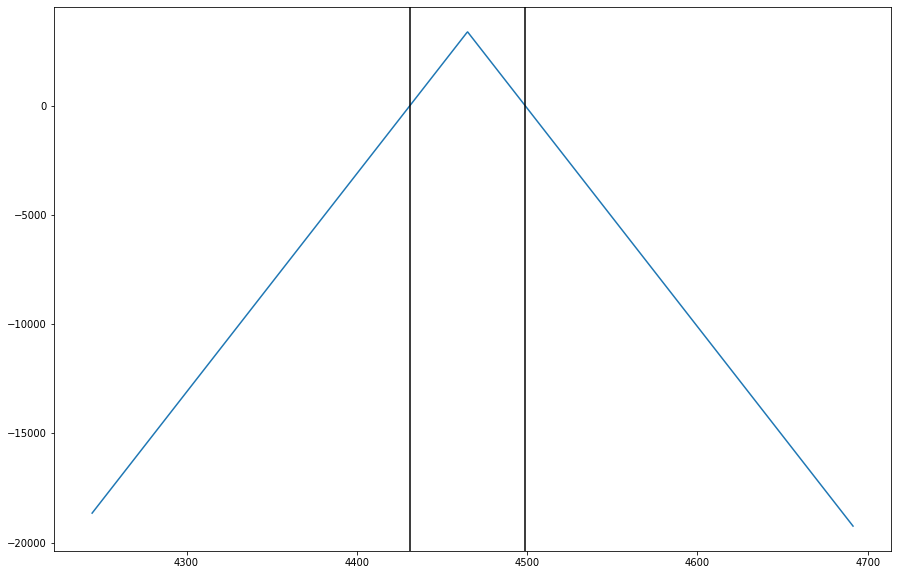

In [179]:
plt.plot(prices, test)
plt.axvline(strike + premium, color="black")
plt.axvline(strike - premium, color="black")